In [3]:
import pyms
from pyms.Ionization import orbital,transition_potential
from abtem.ionization import SubshellTransitions
import numpy as np
import matplotlib.pyplot as plt


# principal and orbital angular momentum quantum numbers for bound state
Z=79
n=2
l=0
lprime = 0
epsilon = 10

Au_transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=epsilon,order=2)
bound_config = Au_transitions.bound_configuration
excited_config = Au_transitions.excited_configuration

AuL = orbital(Z,bound_config,n,l)

# Ionization energy (above ionization threshhold energy)

#angular momentum quantum number for ionized state
# 
# AuFree = orbital(Z,excited_config,0,lprime,epsilon=epsilon)

rmax = 1
r = np.linspace(0, rmax, 10000)

#Plot the radial component of the wave function
# SiK.plot(show=False)
# SiFree.plot(show=False)


In [22]:
bound_config = Au_transitions.bound_configuration
bound_config

'1s2 2s2 2p6 3s2 3p6 3d10 4s2 4p6 4d10 5s2 5p6 4f14 5d10 6s1'

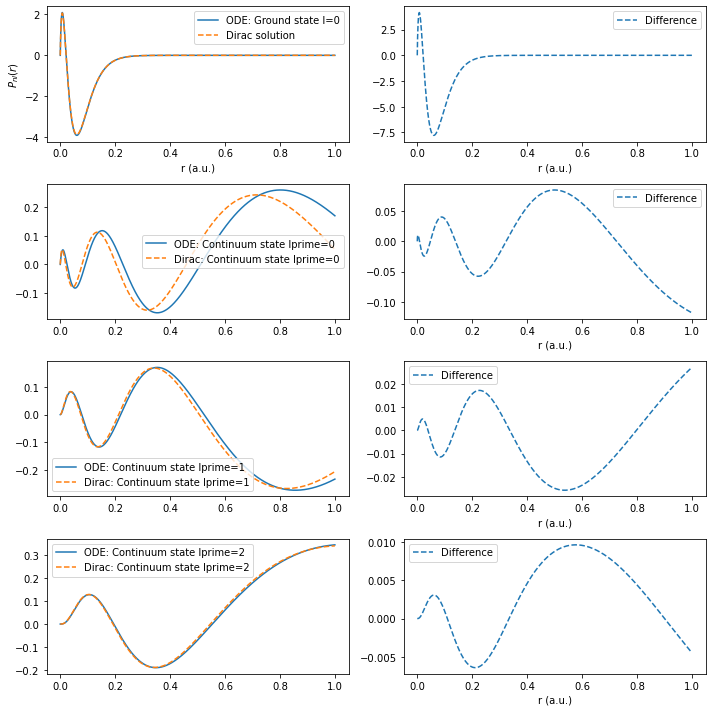

In [6]:

fig, ax = plt.subplots(4,2,figsize=(10,10))
ax[0,0].plot(r,Au_transitions.get_bound_wave()(r),'-',label='ODE: Ground state l=0')
ax[0,0].plot(r,AuL(r),'--',label='Dirac solution')

# ylim = [-2,3]
# ax[0,0].set_ylim(ylim)
ax[0,0].set_xlabel("r (a.u.)")
ax[0,0].set_ylabel("$P_{nl}(r)$")
ax[0,0].legend()

ax[0,1].plot(r,AuL(r)-Au_transitions.get_bound_wave()(r),'--',label='Difference')
ax[0,1].set_xlabel("r (a.u.)")
ax[0,1].legend()
plt.tight_layout()

for i in range(3):
    x = Au_transitions.get_continuum_waves()[i](r)
    # y = O_transitions.get_continuum_waves()[1](r)
    AuFree = orbital(Z,excited_config,0,i,epsilon=epsilon)
    ax[i+1,0].plot(r,x,'-',label='ODE: Continuum state lprime='+str(i))
    ax[i+1,0].plot(r,AuFree(r),'--',label='Dirac: Continuum state lprime='+str(i))
    ax[i+1,0].legend()
    ax[i+1,1].plot(r,AuFree(r)-x,'--',label='Difference')
    ax[i+1,1].set_xlabel("r (a.u.)")
    ax[i+1,1].legend()
    plt.tight_layout()



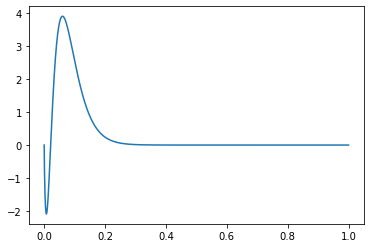

In [9]:
plt.plot(r,Au_transitions.get_bound_wave()(r),'-',label='ODE: Ground state l=0')
plt.show()